In [8]:
import torch
import matplotlib.pyplot as plt 


In [20]:
seasonality = 24
length = 672 + 24
length

696

In [60]:
positions=torch.arange(24).type(torch.float32).repeat(length // seasonality + 1)[-length:]

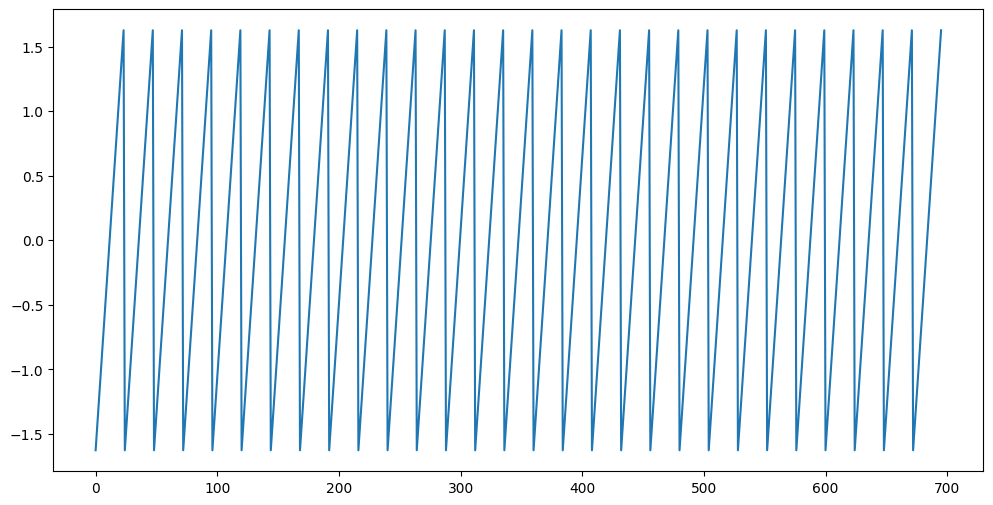

In [61]:
plt.figure(figsize=(12,6))
vals=torch.arange(24).type(torch.float32)
mean=vals.mean()
std=vals.std()
plt.plot((positions - mean) / std)

In [169]:
torch.arange(24) - 12

tensor([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11])

In [200]:
dims=8
positions=(torch.arange(24)).type(torch.float32).repeat(length // seasonality + 1)[-length:]
# positions=torch.arange(length).type(torch.float32)
positions = positions.unsqueeze(1).repeat(1, dims)
# positions=torch.arange(length)
dim_positions=torch.pow(torch.tensor([1e4]), 2*(torch.arange(dims) // 2)/dims).unsqueeze(0)

positions[:, ::2] = torch.sin(positions[:, ::2] / dim_positions[:, ::2])
positions[:, 1::2] = torch.cos(positions[:, 1::2] / dim_positions[:, 1::2])


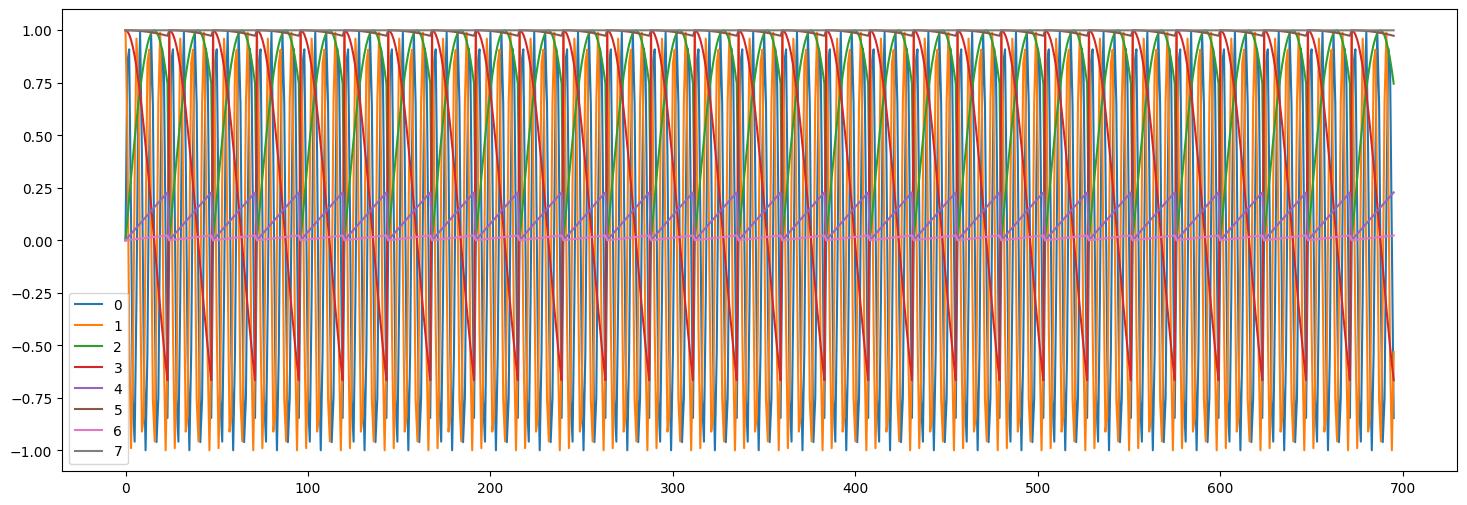

In [203]:
plt.figure(figsize=(18,6))

for i in range(dims):
    plt.plot(positions[:, i], label=i)

plt.legend()

<Axes: >

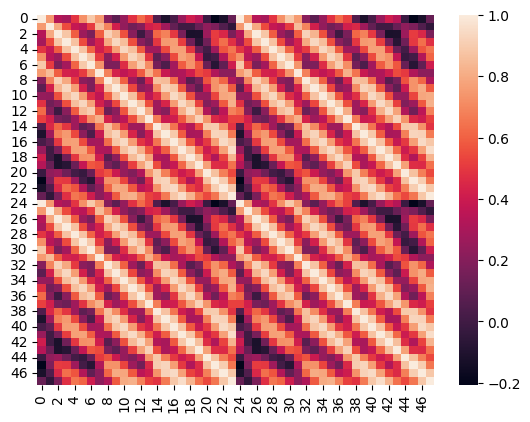

In [202]:
import seaborn as sns 
sns.heatmap(positions.corrcoef()[:48, :48])